In [37]:
#Imports related to the procedure.
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import time
import pickle

start=time.time()
preprocessing_flag=False

In [38]:
#For unvectorized dataset, this gives lesser accuracy.
data=pd.read_csv("emails.csv") #Read the data.
#Converting spam and ham to 1 and O and removing Category section.
data["Prediction"]=data['Category'].apply(lambda x: 1 if (x=='spam' or x==1) else 0)
data=data.iloc[:,1:]

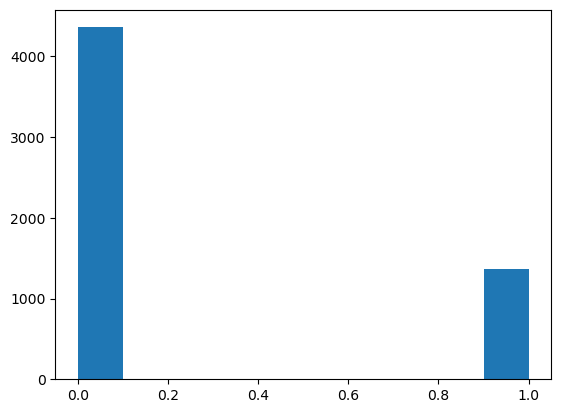

In [39]:
#Uneven data distribution.
plt.hist(data['Prediction'])
plt.show()
plt.close()

In [40]:
#To generate output from any given email text, we count vectorize it's contents.
cv=CountVectorizer() #The vectorizer machine.
x=data['Message']
y=data['Prediction']
data=cv.fit_transform(x).toarray()

In [41]:
#Next sections will deal with the Naive Bayes model.

In [42]:
#Pre-implemented Naive Bayes model.
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.33, random_state=125)
from sklearn.naive_bayes import MultinomialNB

# Building a Multinomial Classifier. Good for non continuous occurance based data.
model = MultinomialNB()

# Model training.
model.fit(X_train, y_train)
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score)
y_pred = model.predict(X_test) #Prediction against test data.
accuracy = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", (accuracy*100),'%')
print("F1 Score (Precision and Recall):", f1)
conf_m=confusion_matrix(y_pred, y_test) #The confusion matrix.
print("Total time elapsed in model prediction:",(time.time()-start),"secs")

Accuracy: 99.04761904761905 %
F1 Score (Precision and Recall): 0.9904484969496818
Total time elapsed in model prediction: 7.387375831604004 secs


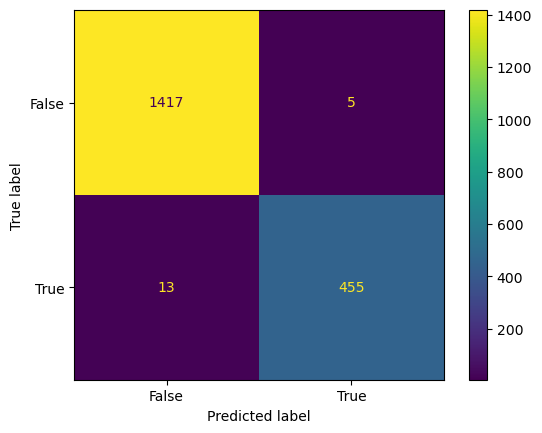

In [43]:
cm_display= ConfusionMatrixDisplay(confusion_matrix= conf_m, display_labels= [False, True])
cm_display.plot()
plt.show() #Plotting the confusion matrix.
plt.close()

In [44]:
#Model can be pickled and tested only for unvectorized data. Vectorized data trials were just for testing.

In [45]:
#Now we pickle the state of the model and the count vectorizer.
pickle.dump(model, open("Email_Model.pkl","wb")) #wb denotes write in binary.
pickle.dump(cv, open("Vectorizer.pkl","wb"))

In [15]:
#Model tester.
msg=input("Enter msg! ")
data=[msg]
test_val=cv.transform(data).toarray()
pred=model.predict(test_val)
print(pred)

Enter msg! You won 100 dollars cash lottery.
[1]
